# Iris Data Set - Naive Bayes Classification

### Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk

### Loading the dataset

In [2]:
irisdata = pd.read_csv('iris_dataset_with_class_information.csv')

In [3]:
irisdata.shape

(150, 5)

In [4]:
irisdata

,sepal.length.in.cm,sepal.width.in.cm,petal.length.in.cm,petal.width.in.cm,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### DataFrame Objects

In [5]:
X1 = irisdata['sepal.length.in.cm']

In [6]:
X1

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal.length.in.cm, Length: 150, dtype: float64

In [7]:
X2 = irisdata[['sepal.length.in.cm','sepal.width.in.cm']]

In [8]:
X2

,sepal.length.in.cm,sepal.width.in.cm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


### Subsetting Examples

In [9]:
irisdata.iloc[0:10,0:5] 

,sepal.length.in.cm,sepal.width.in.cm,petal.length.in.cm,petal.width.in.cm,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [10]:
irisdata.iloc[:10,:5] 

,sepal.length.in.cm,sepal.width.in.cm,petal.length.in.cm,petal.width.in.cm,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [11]:
irisdata.iloc[145:,2:]

,petal.length.in.cm,petal.width.in.cm,species
145,5.2,2.3,virginica
146,5.0,1.9,virginica
147,5.2,2.0,virginica
148,5.4,2.3,virginica
149,5.1,1.8,virginica


### Renaming the columns

In [12]:
irisdata.columns= ["sepalLength", "sepalWidth", "petalLength","petalWidth", "Class"]

In [13]:
irisdata.head()

,sepalLength,sepalWidth,petalLength,petalWidth,Class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Seaborn library for graphics

In [14]:
import seaborn as sb

<AxesSubplot:xlabel='sepalLength', ylabel='sepalWidth'>

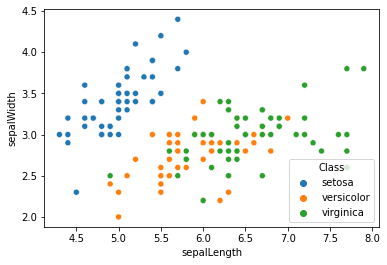

In [15]:
sb.scatterplot(x="sepalLength", y="sepalWidth", data=irisdata, hue="Class") # Hue is what we are color coding by

<AxesSubplot:xlabel='petalLength', ylabel='petalWidth'>

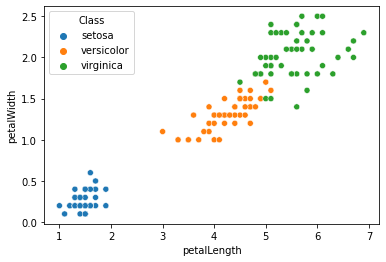

In [16]:
sb.scatterplot(x="petalLength", y="petalWidth", data=irisdata, hue="Class")

<AxesSubplot:xlabel='petalLength', ylabel='petalWidth'>

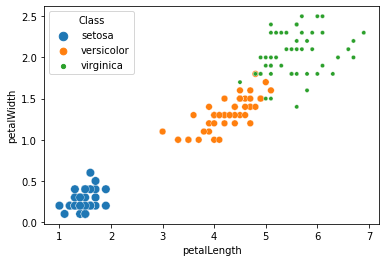

In [17]:
sb.scatterplot(x="petalLength", y="petalWidth", data=irisdata, size="Class", hue = "Class")
# Dot sizes will change by class

### Shuffling/Splitting the data into train/test

In [18]:
X = irisdata.iloc[:,:-1]
y = irisdata.iloc[:,-1]

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)

In [64]:
X_train.shape

(120, 4)

In [65]:
y_train.shape

(120,)

In [66]:
X_test.shape

(30, 4)

In [67]:
y_test.shape

(30,)

### Naive Bayes Classification

We use GaussianNB library. The assumption here is that the attributes come from a Gaussian distribution whose mean and variance can be estimated from the data given

In [68]:
from sklearn.naive_bayes import GaussianNB

In [69]:
model = GaussianNB() #Creating object model

In [70]:
model.fit(X_train,y_train)

GaussianNB()

In [71]:
modelPrediction=model.predict(X_test)

In [72]:
modelPrediction

array(['versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'setosa',
       'setosa', 'virginica', 'virginica', 'setosa', 'setosa',
       'versicolor', 'virginica', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'virginica'],
      dtype='<U10')

#### Testing the predictions

In [73]:
 np.sum(y_test==modelPrediction)

27

In [35]:
modelPrediction.shape

(30,)

29 out of 30 flowers were predicted, this is a good model

In [36]:
pd.set_option("display.max_rows",200)

In [41]:
y_test==modelPrediction
#This will show where we can find the one false prediction

40      True
146     True
38      True
99      True
143     True
116     True
148     True
39      True
135     True
23      True
66      True
16      True
31      True
21      True
50      True
125     True
108     True
61      True
6       True
72      True
1       True
71      True
126     True
78      True
24      True
145     True
77     False
90      True
11      True
41      True
Name: Class, dtype: bool

In [38]:
np.sum(y_test==modelPrediction)/y_test.size

0.9666666666666667

This model has a 96.7% accuracy 

In [39]:
pd.reset_option("display.max_rows")